<a href="https://colab.research.google.com/github/bksat90kc/KaggleChallenge/blob/main/KaggleChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pdpbox
!pip install git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 59.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 63.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 7.3 MB/s eta 0:00:00
  Attempting uninstall: sphinx
    Found existing installation: Sphinx 5.0.2
    Uninstalling Sphinx-5.0.2:
      Successfully uninstalled Sphinx-5.0.2
  Cloning https://github.com/MaximeJumelle/ALEPython.git (to revision dev) to /tmp/pip-install-53jxaxui/alepython_b0604d7703604df28026874a008859c8
  Running command git clone --filter=blob:none --quiet https://github.com/MaximeJumelle/ALEPython.git /tmp/pip-install-53jxaxui/alepython_b0604d7703604df28026874a008859c8
  Resolved https://github.com/MaximeJumelle/ALEPython.git to commit 286350ab674980a32270db2a0b5ccca1380312a7
  Preparing metadata

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import shap
import warnings

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pdpbox import pdp
from alepython import ale_plot
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

warnings.filterwarnings('ignore')

In [3]:
# URL's for test and train data
train_url = 'https://raw.githubusercontent.com/bksat90kc/KaggleChallenge/main/train.csv'
test_url = 'https://raw.githubusercontent.com/bksat90kc/KaggleChallenge/main/test.csv'

**1. Loading Data**

In [4]:
# read the train data
train_df = pd.read_csv(train_url)
train_df.drop('Name', axis=1, inplace=True)

In [5]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [6]:
# read the test data
test_df = pd.read_csv(test_url)
test_df.drop('Name', axis=1, inplace=True)

In [7]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


**2. EDA**

<Axes: >

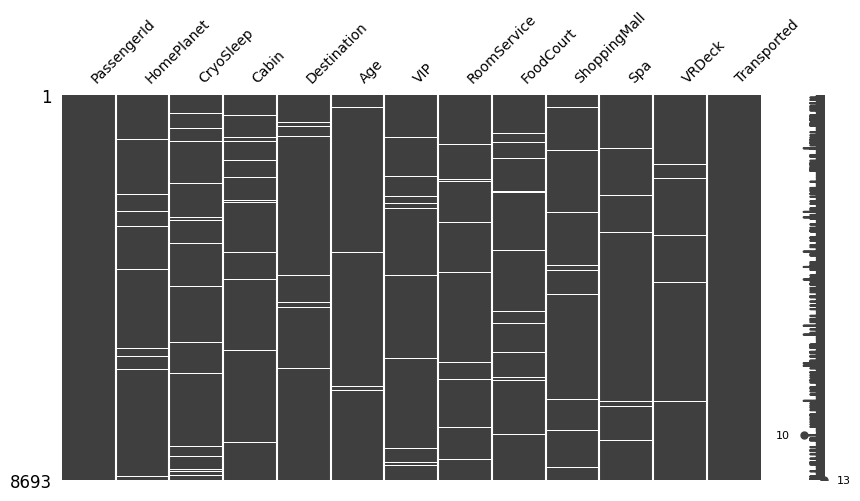

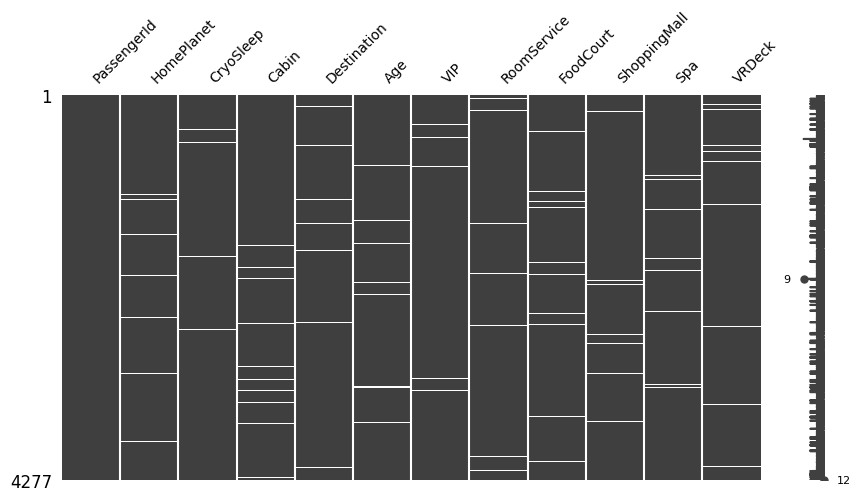

In [8]:
# Show missing values:
msno.matrix(train_df,figsize=(10,5),fontsize=10)
msno.matrix(test_df,figsize=(10,5),fontsize=10)

In [9]:
# extract the cabin details
train_df[['Deck', 'CabinNum', 'Side']] = train_df['Cabin'].str.split('/', expand=True)

In [33]:
# extract the cabin details
test_df[['Deck', 'CabinNum', 'Side']] = test_df['Cabin'].str.split('/', expand=True)

**3. Data Pre-Processing**

3.1 Pre-Processing Train Data

In [ ]:
train_df.drop(['CabinNum'], axis=1, inplace=True)

In [22]:
# dataframe information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    8693 non-null   object 
 1   HomePlanet     8693 non-null   object 
 2   CryoSleep      8693 non-null   object 
 3   Cabin          8494 non-null   object 
 4   Destination    8693 non-null   object 
 5   Age            8693 non-null   float64
 6   VIP            8693 non-null   object 
 7   RoomService    8693 non-null   float64
 8   FoodCourt      8693 non-null   float64
 9   ShoppingMall   8693 non-null   float64
 10  Spa            8693 non-null   float64
 11  VRDeck         8693 non-null   float64
 12  Transported    8693 non-null   bool   
 13  Deck           8494 non-null   object 
 14  Side           8693 non-null   object 
 15  Earth          8693 non-null   float64
 16  Europa         8693 non-null   float64
 17  Mars           8693 non-null   float64
 18  UnSrc   

In [23]:
# dataframe information
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Earth,Europa,Mars,UnSrc,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Unk,Side_P,Side_S,Side_Unk
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,...,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,220.009318,448.434027,169.572300,304.588865,298.261820,0.529391,0.245140,0.202347,0.023122,...,0.085931,0.054987,0.100771,0.321408,0.294375,0.000575,0.022892,0.483838,0.493270,0.022892
std,14.339054,660.519050,1595.790627,598.007164,1125.562559,1134.126417,0.499164,0.430195,0.401772,0.150300,...,0.280279,0.227968,0.301042,0.467044,0.455787,0.023977,0.149568,0.499767,0.499983,0.149568
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,41.000000,61.000000,22.000000,53.000000,40.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# replace NaN values in dataframe
values = {'HomePlanet': 'unknown', 'CryoSleep': 0, 'CabinNum': 0,
          'Destination': 'unknown', 'VIP': 'False', 'RoomService': 0,
          'FoodCourt': 0, 'ShoppingMall': 0, 'Spa':0, 'VRDeck': 0, 'Side': 'Unknown'}
train_df.fillna(value=values, inplace=True)

In [12]:
# # label encoding for Deck
# lab_enc = LabelEncoder()
# lab_enc.fit(train_df['Deck'])
# train_df['Deck'] = lab_enc.transform(train_df['Deck'])
# train_df['Deck'].unique()

In [13]:
# average imputation
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)

In [14]:
# one hot encoding for HomePlanet, Destination, Deck, and Side
oh1 = OneHotEncoder()
oh1.fit(train_df[['HomePlanet', 'Destination', 'Deck', 'Side']])

OneHotEncoder()

In [15]:
# categories in HomePlanet
oh1.categories_

[array(['Earth', 'Europa', 'Mars', 'unknown'], dtype=object),
 array(['55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e', 'unknown'],
       dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', nan], dtype=object),
 array(['P', 'S', 'Unknown'], dtype=object)]

In [16]:
# transform the one hot encoder object for train data
oh_train = oh1.transform(train_df[['HomePlanet', 'Destination',
                                   'Deck', 'Side']]).toarray()

In [17]:
# shape of the output
print('Shape of one-hot encoded HomePlanet data:', oh_train.shape)

Shape of one-hot encoded HomePlanet data: (8693, 20)


In [18]:
oh_train

array([[0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [19]:
# new transformed data for the HomePlanet
oh_train_df = pd.DataFrame(oh_train, columns=['Earth', 'Europa', 'Mars', 'UnSrc',
                                           '55 Cancri e', 'PSO J318.5-22',
                                           'TRAPPIST-1e', 'UnDes', 'Deck_A',
                                           'Deck_B', 'Deck_C', 'Deck_D',
                                           'Deck_E', 'Deck_F', 'Deck_G',
                                           'Deck_T', 'Deck_Unk', 'Side_P', 'Side_S', 'Side_Unk'])
oh_train_df.head()

,Earth,Europa,Mars,UnSrc,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,UnDes,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Unk,Side_P,Side_S,Side_Unk
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
# concatenating two dataframes
train_df = pd.concat([train_df, oh_train_df], axis=1, join='inner')

In [24]:
# convert Transported column to numeric values : 0 for False and 1 for True
train_df.loc[train_df["Transported"] == False, "Transported"] = 0
train_df.loc[train_df["Transported"] == True, "Transported"] = 1

# convert VIP column to numeric values : 0 for False and 1 for True
train_df.loc[train_df["VIP"] == False, "VIP"] = 0
train_df.loc[train_df["VIP"] == 'False', "VIP"] = 0
train_df.loc[train_df["VIP"] == True, "VIP"] = 1

# convert CryoSleep column to numeric values : 0 for False and 1 for True
train_df.loc[train_df["CryoSleep"] == False, "CryoSleep"] = 0
train_df.loc[train_df["CryoSleep"] == 'False', "CryoSleep"] = 0
train_df.loc[train_df["CryoSleep"] == True, "CryoSleep"] = 1

In [25]:
# convert the data type to integer
columns = ['CryoSleep', 'Transported', 'VIP', 'Earth', 'Europa', 'Mars',
           'UnSrc', '55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e', 'UnDes',
           'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G',
           'Deck_T', 'Deck_Unk', 'Side_P', 'Side_S', 'Side_Unk']

for col in columns:
  train_df[col] = train_df[col].astype('int64')

In [26]:
# Change the index to PassengerId
train_df.index = train_df['PassengerId']

In [27]:
train_df.drop(['HomePlanet', 'Destination', 'Cabin',
               'PassengerId', 'Deck', 'Side'], axis=1, inplace=True)

In [29]:
# extract required train data
X_train = train_df.drop('Transported', axis=1)
y_train = train_df[['Transported']]

In [30]:
X_train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Earth,Europa,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Unk,Side_P,Side_S,Side_Unk
PassengerId,,,,,,,,,,,,,,,,,,,,,
0001_01,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,1,0,0
0002_01,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,...,0,0,0,1,0,0,0,0,1,0
0003_01,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,...,0,0,0,0,0,0,0,0,1,0
0003_02,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,...,0,0,0,0,0,0,0,0,1,0
0004_01,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [31]:
columns = X_train.columns
for col in columns:
  check_nan = train_df[col].isnull().values.any()
  print(col, check_nan)

CryoSleep False
Age False
VIP False
RoomService False
FoodCourt False
ShoppingMall False
Spa False
VRDeck False
Earth False
Europa False
Mars False
UnSrc False
55 Cancri e False
PSO J318.5-22 False
TRAPPIST-1e False
UnDes False
Deck_A False
Deck_B False
Deck_C False
Deck_D False
Deck_E False
Deck_F False
Deck_G False
Deck_T False
Deck_Unk False
Side_P False
Side_S False
Side_Unk False


3.2 Pre-Processing Test Data

In [34]:
test_df.drop(['CabinNum'], axis=1, inplace=True)

In [35]:
# replace NaN values in dataframe
values = {'HomePlanet': 'unknown', 'CryoSleep': 0,
          'Destination': 'unknown', 'VIP': 'False', 'RoomService': 0,
          'FoodCourt': 0, 'ShoppingMall': 0, 'Spa':0, 'VRDeck': 0, 'Side': 'unknown'}
test_df.fillna(value=values, inplace=True)

In [36]:
# # label encoding for Deck
# test_df['Deck'] = lab_enc.transform(test_df['Deck'])
# test_df['Deck'].unique()

In [37]:
# average imputation
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)

In [38]:
# one hot encoding for test data
oh2 = OneHotEncoder()
oh2.fit(test_df[['HomePlanet', 'Destination', 'Deck', 'Side']])

OneHotEncoder()

In [39]:
# categories in HomePlanet
oh2.categories_

[array(['Earth', 'Europa', 'Mars', 'unknown'], dtype=object),
 array(['55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e', 'unknown'],
       dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', nan], dtype=object),
 array(['P', 'S', 'unknown'], dtype=object)]

In [40]:
# transform the one hot encoder object for train data
oh_test = oh2.transform(test_df[['HomePlanet', 'Destination',
                                   'Deck', 'Side']]).toarray()

In [41]:
# shape of the output
print('Shape of one-hot encoded HomePlanet data:', oh_test.shape)

Shape of one-hot encoded HomePlanet data: (4277, 20)


In [42]:
oh_test

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [43]:
# new transformed test data
oh_test_df = pd.DataFrame(oh_test, columns=['Earth', 'Europa', 'Mars', 'UnSrc',
                                           '55 Cancri e', 'PSO J318.5-22',
                                           'TRAPPIST-1e', 'UnDes', 'Deck_A',
                                           'Deck_B', 'Deck_C', 'Deck_D',
                                           'Deck_E', 'Deck_F', 'Deck_G',
                                           'Deck_T', 'Deck_Unk', 'Side_P', 'Side_S', 'Side_Unk'])
oh_test_df.head()

,Earth,Europa,Mars,UnSrc,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,UnDes,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Unk,Side_P,Side_S,Side_Unk
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [44]:
# concatenating two dataframes
test_df = pd.concat([test_df, oh_test_df], axis=1, join='inner')

In [45]:
# convert VIP column to numeric values : 0 for False and 1 for True
test_df.loc[test_df["VIP"] == False, "VIP"] = 0
test_df.loc[test_df["VIP"] == 'False', "VIP"] = 0
test_df.loc[test_df["VIP"] == True, "VIP"] = 1


# convert CryoSleep column to numeric values : 0 for False and 1 for True
test_df.loc[test_df["CryoSleep"] == False, "CryoSleep"] = 0
test_df.loc[test_df["CryoSleep"] == 'False', "CryoSleep"] = 0
test_df.loc[test_df["CryoSleep"] == True, "CryoSleep"] = 1

In [46]:
# convert the data type to integer
columns = ['CryoSleep', 'VIP', 'Earth', 'Europa', 'Mars',
           'UnSrc', '55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e', 'UnDes',
           'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G',
           'Deck_T', 'Deck_Unk', 'Side_P', 'Side_S', 'Side_Unk']

for col in columns:
  test_df[col] = test_df[col].astype('int64')


In [47]:
# Change the index to PassengerId
test_df.index = test_df['PassengerId']

In [48]:
test_df.drop(['HomePlanet', 'Destination', 'Cabin', 'PassengerId', 'Deck', 'Side'], axis=1, inplace=True)

In [49]:
test_df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Earth,Europa,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Unk,Side_P,Side_S,Side_Unk
PassengerId,,,,,,,,,,,,,,,,,,,,,
0013_01,1,27.0,0,0.0,0.0,0.0,0.0,0.0,1,0,...,0,0,0,0,1,0,0,0,1,0
0018_01,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,1,0,...,0,0,0,1,0,0,0,0,1,0
0019_01,1,31.0,0,0.0,0.0,0.0,0.0,0.0,0,1,...,1,0,0,0,0,0,0,0,1,0
0021_01,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,0,1,...,1,0,0,0,0,0,0,0,1,0
0023_01,0,20.0,0,10.0,0.0,635.0,0.0,0.0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [50]:
columns = test_df.columns
for col in columns:
  check_nan = test_df[col].isnull().values.any()
  print(col, check_nan)

CryoSleep False
Age False
VIP False
RoomService False
FoodCourt False
ShoppingMall False
Spa False
VRDeck False
Earth False
Europa False
Mars False
UnSrc False
55 Cancri e False
PSO J318.5-22 False
TRAPPIST-1e False
UnDes False
Deck_A False
Deck_B False
Deck_C False
Deck_D False
Deck_E False
Deck_F False
Deck_G False
Deck_T False
Deck_Unk False
Side_P False
Side_S False
Side_Unk False


3.3. Data Transformation using StandardScaler

In [51]:
# Standard Scaler for transformation
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
test_df_scaled = scaler.transform(test_df)

**4. Modelling**

Following Classification are conducted:


1.   Logistic Regression
2.   Random Forrest



In [52]:
# logistic regression
lrcl = LogisticRegression()
lrcl.fit(X_train_scaled, y_train)

LogisticRegression()

In [53]:
# random forrest classifier
rfcl = RandomForestClassifier()
rfcl.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [62]:
# finding predictions for each algorithm
lr_y_pred = lrcl.predict(test_df_scaled)
rf_y_pred = rfcl.predict(test_df_scaled)

In [63]:
# reshaping the predictions
lr_y_pred = lr_y_pred.reshape(-1, 1)
rf_y_pred = rf_y_pred.reshape(-1, 1)

In [64]:
# creating the dataframes for the predictions
lr_pred_df = pd.DataFrame(lr_y_pred, columns=['Transported'])
rf_pred_df = pd.DataFrame(rf_y_pred, columns=['Transported'])

In [71]:
lr_y_train_pred = lrcl.predict(X_train_scaled)
rf_y_train_pred = rfcl.predict(X_train_scaled)

**5. Performance Analysis**

In [57]:
# performance result for logistic regression
print("Confusion Matrix:")
print(confusion_matrix(y_train, lr_y_train_pred))
print("Classification report:")
print(classification_report(y_train, lr_y_train_pred))

Confusion Matrix:
[[3338  977]
 [ 839 3539]]
Classification report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.79      4315
           1       0.78      0.81      0.80      4378

    accuracy                           0.79      8693
   macro avg       0.79      0.79      0.79      8693
weighted avg       0.79      0.79      0.79      8693



In [58]:
# performance result for random forrest
print("Confusion Matrix:")
print(confusion_matrix(y_train, rf_y_train_pred))
print("Classification report:")
print(classification_report(y_train, rf_y_train_pred))

Confusion Matrix:
[[4000  315]
 [ 127 4251]]
Classification report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      4315
           1       0.93      0.97      0.95      4378

    accuracy                           0.95      8693
   macro avg       0.95      0.95      0.95      8693
weighted avg       0.95      0.95      0.95      8693



**6. XAI**

In [449]:
features = X_train.columns.tolist()
partial_plot = pdp.PDPIsolate(model=rfcl,
                              df=X_train,
                              model_features=features,
                              feature="CryoSleep",
                              feature_name="CryoSleep",
                              n_classes=0)

fig, axes = partial_plot.plot(center=False, plot_lines=True, plot_pts_dist=True)
fig

obtain pred_func from the provided model.


  0%|          | 0/2 [00:00<?, ?it/s]

ValueError: X has 29 features, but RandomForestClassifier is expecting 28 features as input.

In [446]:
len(features)

29

In [447]:
X_train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Earth,Europa,...,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Unk,Side_P,Side_S,Side_Unk,x
PassengerId,,,,,,,,,,,,,,,,,,,,,
0001_01,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,1,0,0,0
0002_01,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,...,0,0,1,0,0,0,0,1,0,0
0003_01,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,...,0,0,0,0,0,0,0,1,0,0
0003_02,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,...,0,0,0,0,0,0,0,1,0,0
0004_01,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [515]:
test_df.index = test_df['PassengerId']
test_df.drop(['PassengerId'], axis=1, inplace=True)

In [516]:
test_df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Earth,Europa,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Unk,Side_P,Side_S,Side_Unk
PassengerId,,,,,,,,,,,,,,,,,,,,,
0013_01,1,27.0,0,0.0,0.0,0.0,0.0,0.0,1,0,...,0,0,0,0,1,0,0,0,1,0
0018_01,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,1,0,...,0,0,0,1,0,0,0,0,1,0
0019_01,1,31.0,0,0.0,0.0,0.0,0.0,0.0,0,1,...,1,0,0,0,0,0,0,0,1,0
0021_01,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,0,1,...,1,0,0,0,0,0,0,0,1,0
0023_01,0,20.0,0,10.0,0.0,635.0,0.0,0.0,1,0,...,0,0,0,1,0,0,0,0,1,0


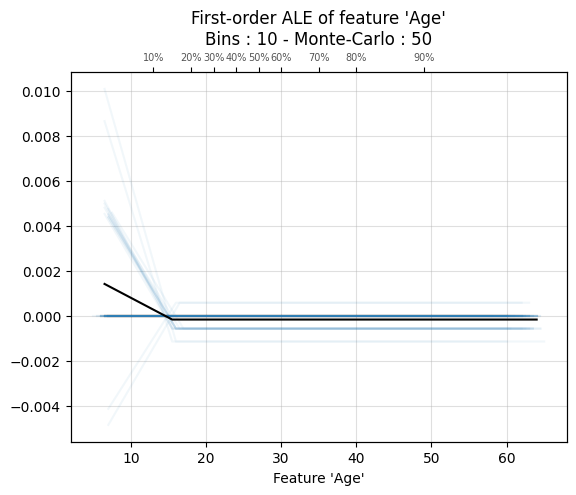

<Axes: title={'center': "First-order ALE of feature 'Age'\nBins : 10 - Monte-Carlo : 50"}, xlabel="Feature 'Age'">

In [520]:
# X_train = train.drop('mpg', axis=1)
ale_plot(rfcl, test_df, 'Age', monte_carlo="TRUE")

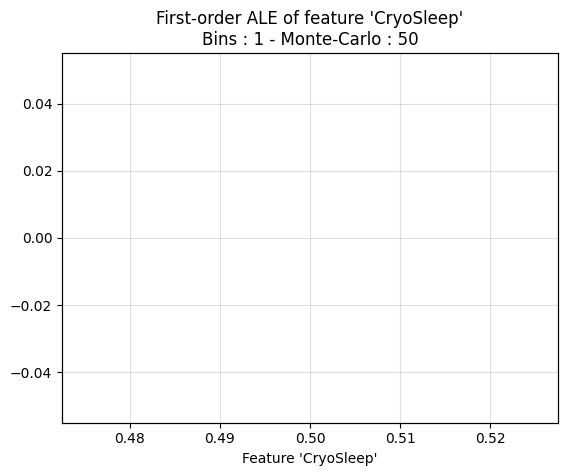

<Axes: title={'center': "First-order ALE of feature 'CryoSleep'\nBins : 1 - Monte-Carlo : 50"}, xlabel="Feature 'CryoSleep'">

In [521]:
ale_plot(rfcl, test_df, 'CryoSleep', monte_carlo="TRUE")

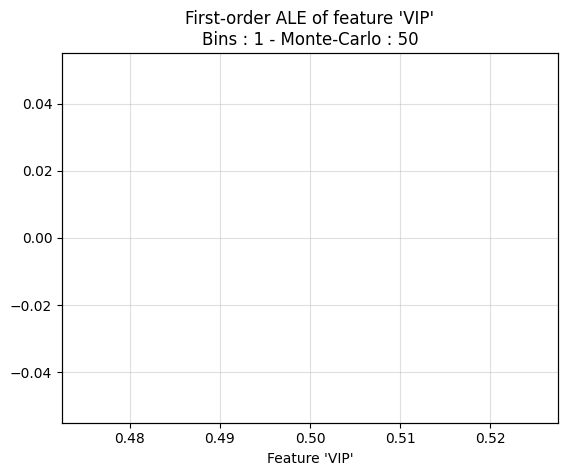

<Axes: title={'center': "First-order ALE of feature 'VIP'\nBins : 1 - Monte-Carlo : 50"}, xlabel="Feature 'VIP'">

In [522]:
ale_plot(rfcl, test_df, 'VIP', monte_carlo="TRUE")

In [ ]:
explainer =shap.TreeExplainer(rfcl)
shap_values = explainer.shap_values(test_df)

shap.summary_plot(shap_values, test_df)

**7. Prepare predicitons for submission**

In [60]:
test_df.reset_index(inplace=True)

In [68]:
# creating the outcomes
lr_outcome_df = pd.concat([test_df[['PassengerId']], lr_pred_df], axis=1, join='inner')
rf_outcome_df = pd.concat([test_df[['PassengerId']], rf_pred_df], axis=1, join='inner')

In [69]:
# convert Transported column to numeric values : 0 for False and 1 for True
lr_outcome_df.loc[lr_outcome_df["Transported"] == 0, "Transported"] = False
lr_outcome_df.loc[lr_outcome_df["Transported"] == 1, "Transported"] = True

rf_outcome_df.loc[rf_outcome_df["Transported"] == 0, "Transported"] = False
rf_outcome_df.loc[rf_outcome_df["Transported"] == 1, "Transported"] = True

In [70]:
# save the outcomes into the files
lr_outcome_df.to_csv('lr_submission.csv', index=False)
rf_outcome_df.to_csv('rf_submission.csv', index=False)